In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("online_retail.csv")

# Display first few rows
print(df.head())

# --- Data Cleaning ---

# Check for missing values
print(df.isnull().sum())

# Drop rows with missing CustomerID
df_clean = df.dropna(subset=['CustomerID'])

# Remove negative quantities (usually canceled orders)
df_clean = df_clean[df_clean['Quantity'] > 0]

# Create 'Sales' column
df_clean['Sales'] = df_clean['Quantity'] * df_clean['UnitPrice']

# Convert InvoiceDate to datetime
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

# --- Basic KPIs ---

# Total Sales
total_sales = df_clean['Sales'].sum()
print("Total Sales: ", total_sales)

# Total Orders
total_orders = df_clean['InvoiceNo'].nunique()
print("Total Orders: ", total_orders)

# Top Countries by Sales
country_sales = df_clean.groupby('Country')['Sales'].sum().sort_values(ascending=False)
print(country_sales.head())

# --- Monthly Sales Trend ---

df_clean['YearMonth'] = df_clean['InvoiceDate'].dt.to_period('M')
monthly_sales = df_clean.groupby('YearMonth')['Sales'].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

# --- Top Selling Products ---

top_products = df_clean.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Best Selling Products")
plt.xlabel("Total Quantity Sold")
plt.show()

# --- Inventory Turnover vs Profitability (Correlation) ---

# Estimate Profit (assuming 25% margin)
df_clean['Profit'] = df_clean['Sales'] * 0.25

# Group by Product
product_summary = df_clean.groupby('Description').agg({
    'Quantity':'sum',
    'Sales':'sum',
    'Profit':'sum'
}).reset_index()

# Correlation between Quantity Sold and Profit
correlation = product_summary['Quantity'].corr(product_summary['Profit'])
print("Correlation between Quantity Sold and Profit: ", correlation)

sns.scatterplot(x='Quantity', y='Profit', data=product_summary)
plt.title("Inventory Turnover vs Profitability")
plt.xlabel("Quantity Sold")
plt.ylabel("Estimated Profit")
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'online_retail.csv'

In [2]:
import pandas as pd

df = pd.read_csv("online_retail.csv")


FileNotFoundError: [Errno 2] No such file or directory: 'online_retail.csv'

In [3]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (your file name)
df = pd.read_csv("OnlineRetail.csv")

# Display first few rows
print(df.head())

# --- Data Cleaning ---

# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Drop rows with missing CustomerID
df_clean = df.dropna(subset=['CustomerID'])

# Remove canceled orders (Quantity <= 0)
df_clean = df_clean[df_clean['Quantity'] > 0]

# Create 'Sales' column
df_clean['Sales'] = df_clean['Quantity'] * df_clean['UnitPrice']

# Convert InvoiceDate to datetime format
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

# --- KPIs ---

# Total Sales
total_sales = df_clean['Sales'].sum()
print("Total Sales: ", total_sales)

# Total Orders
total_orders = df_clean['InvoiceNo'].nunique()
print("Total Orders: ", total_orders)

# Total Customers
total_customers = df_clean['CustomerID'].nunique()
print("Total Customers: ", total_customers)

# Sales by Country
country_sales = df_clean.groupby('Country')['Sales'].sum().sort_values(ascending=False)
print("Top Countries by Sales:\n", country_sales.head())

# --- Monthly Sales Trend ---

df_clean['YearMonth'] = df_clean['InvoiceDate'].dt.to_period('M')
monthly_sales = df_clean.groupby('YearMonth')['Sales'].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(marker='o', color='teal')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# --- Top Selling Products ---

top_products = df_clean.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Best Selling Products")
plt.xlabel("Total Quantity Sold")
plt.show()

# --- Inventory Turnover vs Profitability (Correlation) ---

# Estimate Profit (assume 25% margin)
df_clean['Profit'] = df_clean['Sales'] * 0.25

# Group by Product for correlation
product_summary = df_clean.groupby('Description').agg({
    'Quantity':'sum',
    'Sales':'sum',
    'Profit':'sum'
}).reset_index()

# Correlation between Quantity and Profit
correlation = product_summary['Quantity'].corr(product_summary['Profit'])
print("Correlation between Quantity Sold and Profit: ", correlation)

# Scatterplot
plt.figure(figsize=(10,6))
sns.scatterplot(x='Quantity', y='Profit', data=product_summary)
plt.title("Inventory Turnover vs Profitability")
plt.xlabel("Quantity Sold")
plt.ylabel("Estimated Profit")
plt.show()

# --- Export Cleaned Data for Power BI ---
df_clean.to_csv("Cleaned_OnlineRetail.csv", index=False)
print("Cleaned dataset exported successfully!")


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 104247: invalid start byte

In [4]:
df = pd.read_csv("OnlineRetail.csv", encoding='ISO-8859-1')


In [5]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (with encoding fix for £ symbol)
df = pd.read_csv("OnlineRetail.csv", encoding='latin1')

# Display first few rows
print(df.head())

# --- Data Cleaning ---

# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Drop rows with missing CustomerID
df_clean = df.dropna(subset=['CustomerID'])

# Remove canceled orders (Quantity <= 0)
df_clean = df_clean[df_clean['Quantity'] > 0]

# Create 'Sales' column
df_clean['Sales'] = df_clean['Quantity'] * df_clean['UnitPrice']

# Convert InvoiceDate to datetime format
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

# --- KPIs ---

# Total Sales
total_sales = df_clean['Sales'].sum()
print("Total Sales: £", round(total_sales, 2))

# Total Orders
total_orders = df_clean['InvoiceNo'].nunique()
print("Total Orders: ", total_orders)

# Total Customers
total_customers = df_clean['CustomerID'].nunique()
print("Total Customers: ", total_customers)

# Sales by Country
country_sales = df_clean.groupby('Country')['Sales'].sum().sort_values(ascending=False)
print("Top Countries by Sales:\n", country_sales.head())

# --- Monthly Sales Trend ---

df_clean['YearMonth'] = df_clean['InvoiceDate'].dt.to_period('M')
monthly_sales = df_clean.groupby('YearMonth')['Sales'].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(marker='o', color='teal')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales (£)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# --- Top Selling Products ---

top_products = df_clean.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Best Selling Products")
plt.xlabel("Total Quantity Sold")
plt.show()

# --- Inventory Turnover vs Profitability (Correlation) ---

# Estimate Profit (assume 25% margin)
df_clean['Profit'] = df_clean['Sales'] * 0.25

# Group by Product for correlation
product_summary = df_clean.groupby('Description').agg({
    'Quantity':'sum',
    'Sales':'sum',
    'Profit':'sum'
}).reset_index()

# Correlation between Quantity and Profit
correlation = product_summary['Quantity'].corr(product_summary['Profit'])
print("Correlation between Quantity Sold and Profit: ", round(correlation, 4))

# Scatterplot
plt.figure(figsize=(10,6))
sns.scatterplot(x='Quantity', y='Profit', data=product_summary)
plt.title("Inventory Turnover vs Profitability")
plt.xlabel("Quantity Sold")
plt.ylabel("Estimated Profit (£)")
plt.show()

# --- Export Cleaned Data for Power BI ---
df_clean.to_csv("Cleaned_OnlineRetail.csv", index=False)
print("Cleaned dataset exported successfully as 'Cleaned_OnlineRetail.csv'")


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID         Country  
0  12-01-2010 08:26       2.55     17850.0  United Kingdom  
1  12-01-2010 08:26       3.39     17850.0  United Kingdom  
2  12-01-2010 08:26       2.75     17850.0  United Kingdom  
3  12-01-2010 08:26       3.39     17850.0  United Kingdom  
4  12-01-2010 08:26       3.39     17850.0  United Kingdom  
Missing values per column:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country            

ValueError: time data "12/13/2010 9:02" doesn't match format "%m-%d-%Y %H:%M", at position 813. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [6]:
# Convert InvoiceDate safely
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'], errors='coerce')

# Drop rows where parsing failed
df_clean = df_clean.dropna(subset=['InvoiceDate'])


In [7]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (with encoding fix for £ symbol)
df = pd.read_csv("OnlineRetail.csv", encoding='latin1')

# Display first few rows
print(df.head())

# --- Data Cleaning ---

# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Drop rows with missing CustomerID
df_clean = df.dropna(subset=['CustomerID'])

# Remove canceled orders (Quantity <= 0)
df_clean = df_clean[df_clean['Quantity'] > 0]

# Create 'Sales' column
df_clean['Sales'] = df_clean['Quantity'] * df_clean['UnitPrice']

# Convert InvoiceDate to datetime format
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

# --- KPIs ---

# Total Sales
total_sales = df_clean['Sales'].sum()
print("Total Sales: £", round(total_sales, 2))

# Total Orders
total_orders = df_clean['InvoiceNo'].nunique()
print("Total Orders: ", total_orders)

# Total Customers
total_customers = df_clean['CustomerID'].nunique()
print("Total Customers: ", total_customers)

# Sales by Country
country_sales = df_clean.groupby('Country')['Sales'].sum().sort_values(ascending=False)
print("Top Countries by Sales:\n", country_sales.head())

# --- Monthly Sales Trend ---

df_clean['YearMonth'] = df_clean['InvoiceDate'].dt.to_period('M')
monthly_sales = df_clean.groupby('YearMonth')['Sales'].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(marker='o', color='teal')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales (£)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# --- Top Selling Products ---

top_products = df_clean.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Best Selling Products")
plt.xlabel("Total Quantity Sold")
plt.show()

# --- Inventory Turnover vs Profitability (Correlation) ---

# Estimate Profit (assume 25% margin)
df_clean['Profit'] = df_clean['Sales'] * 0.25

# Group by Product for correlation
product_summary = df_clean.groupby('Description').agg({
    'Quantity':'sum',
    'Sales':'sum',
    'Profit':'sum'
}).reset_index()

# Correlation between Quantity and Profit
correlation = product_summary['Quantity'].corr(product_summary['Profit'])
print("Correlation between Quantity Sold and Profit: ", round(correlation, 4))

# Scatterplot
plt.figure(figsize=(10,6))
sns.scatterplot(x='Quantity', y='Profit', data=product_summary)
plt.title("Inventory Turnover vs Profitability")
plt.xlabel("Quantity Sold")
plt.ylabel("Estimated Profit (£)")
plt.show()

# --- Export Cleaned Data for Power BI ---
df_clean.to_csv("Cleaned_OnlineRetail.csv", index=False)
print("Cleaned dataset exported successfully as 'Cleaned_OnlineRetail.csv'")


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID         Country  
0  12-01-2010 08:26       2.55     17850.0  United Kingdom  
1  12-01-2010 08:26       3.39     17850.0  United Kingdom  
2  12-01-2010 08:26       2.75     17850.0  United Kingdom  
3  12-01-2010 08:26       3.39     17850.0  United Kingdom  
4  12-01-2010 08:26       3.39     17850.0  United Kingdom  
Missing values per column:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country            

ValueError: time data "12/13/2010 9:02" doesn't match format "%m-%d-%Y %H:%M", at position 813. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [8]:
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'], format='%m/%d/%Y %H:%M')


ValueError: time data "12-01-2010 08:26" doesn't match format "%m/%d/%Y %H:%M", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID         Country  
0  12-01-2010 08:26       2.55     17850.0  United Kingdom  
1  12-01-2010 08:26       3.39     17850.0  United Kingdom  
2  12-01-2010 08:26       2.75     17850.0  United Kingdom  
3  12-01-2010 08:26       3.39     17850.0  United Kingdom  
4  12-01-2010 08:26       3.39     17850.0  United Kingdom  
Missing values per column:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country            

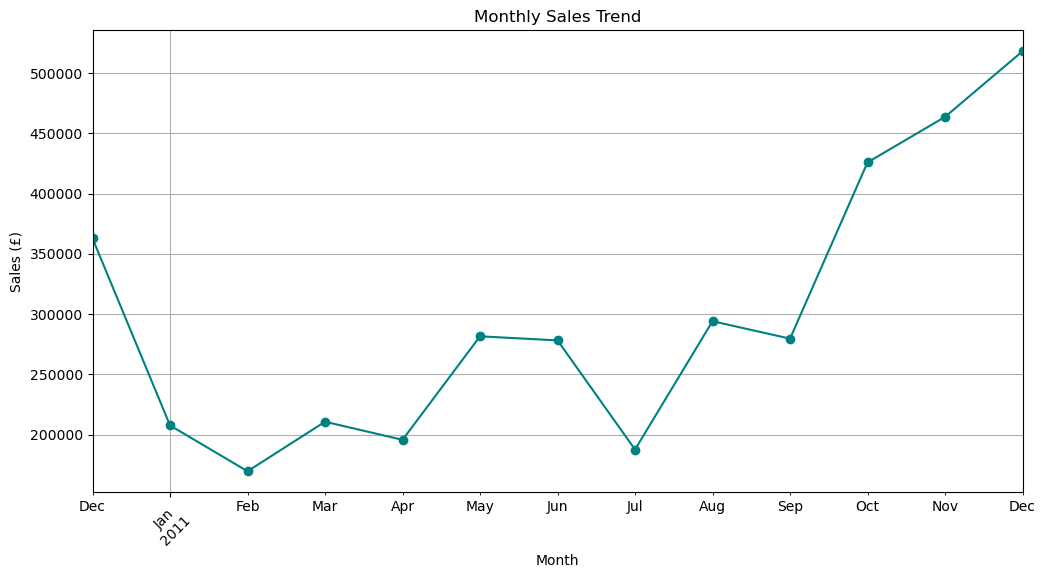

C:\Users\adithya\AppData\Local\Temp\ipykernel_9724\2345829457.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


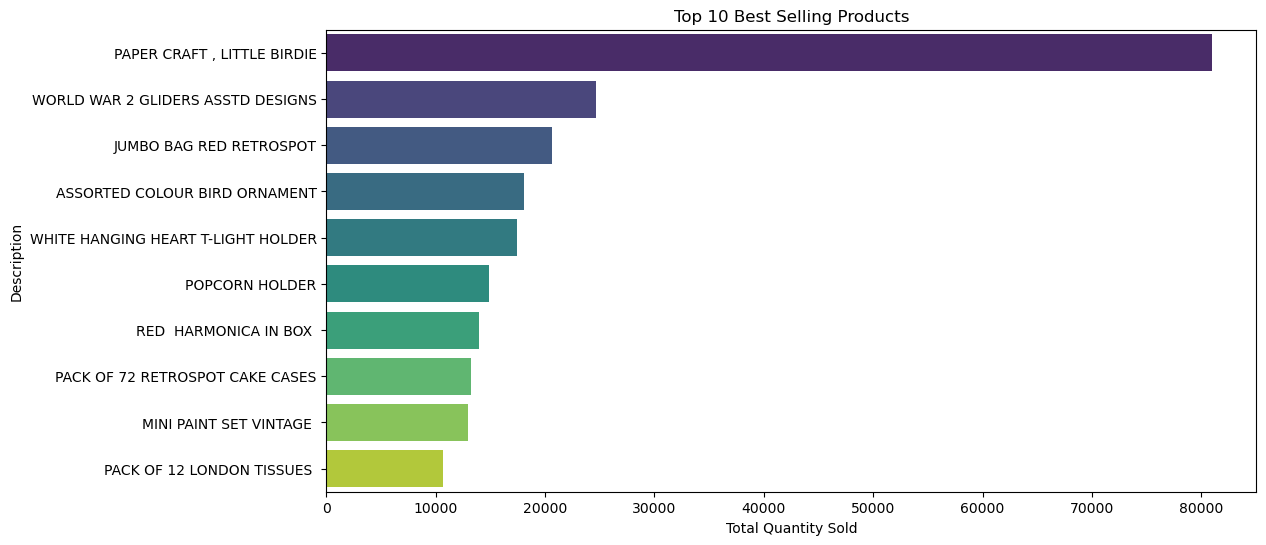

Correlation between Quantity Sold and Profit:  0.8341


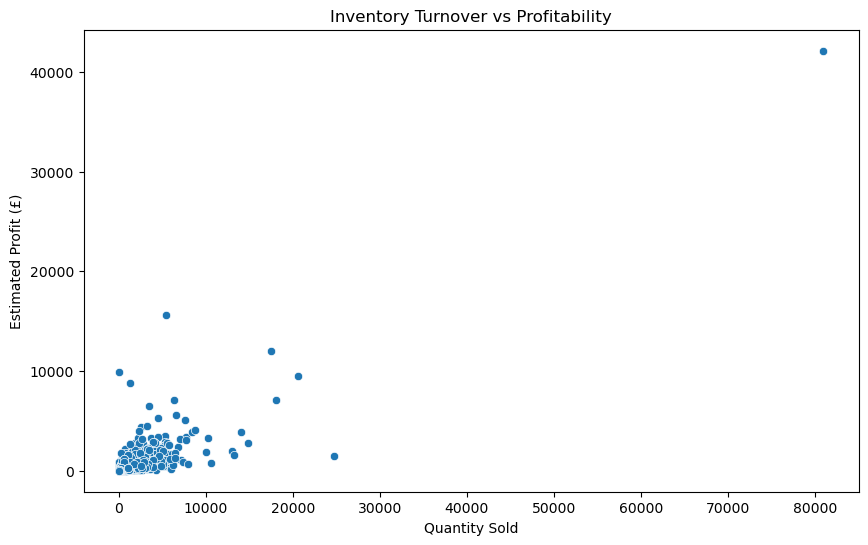

Cleaned dataset exported successfully as 'Cleaned_OnlineRetail.csv'


In [9]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset with encoding fix
df = pd.read_csv("OnlineRetail.csv", encoding='latin1')

# Preview data
print(df.head())

# --- Data Cleaning ---

# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Drop rows with missing CustomerID
df_clean = df.dropna(subset=['CustomerID'])

# Remove canceled orders (Quantity <= 0)
df_clean = df_clean[df_clean['Quantity'] > 0]

# Create 'Sales' column
df_clean['Sales'] = df_clean['Quantity'] * df_clean['UnitPrice']

# Convert InvoiceDate to datetime (safe parsing)
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'], errors='coerce')

# Drop rows where InvoiceDate parsing failed
df_clean = df_clean.dropna(subset=['InvoiceDate'])

# --- KPIs ---

# Total Sales
total_sales = df_clean['Sales'].sum()
print("Total Sales: £", round(total_sales, 2))

# Total Orders
total_orders = df_clean['InvoiceNo'].nunique()
print("Total Orders: ", total_orders)

# Total Customers
total_customers = df_clean['CustomerID'].nunique()
print("Total Customers: ", total_customers)

# Sales by Country
country_sales = df_clean.groupby('Country')['Sales'].sum().sort_values(ascending=False)
print("Top Countries by Sales:\n", country_sales.head())

# --- Monthly Sales Trend ---

df_clean['YearMonth'] = df_clean['InvoiceDate'].dt.to_period('M')
monthly_sales = df_clean.groupby('YearMonth')['Sales'].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(marker='o', color='teal')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales (£)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# --- Top Selling Products ---

top_products = df_clean.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Best Selling Products")
plt.xlabel("Total Quantity Sold")
plt.show()

# --- Inventory Turnover vs Profitability (Correlation) ---

# Estimate Profit (assume 25% margin)
df_clean['Profit'] = df_clean['Sales'] * 0.25

# Group by Product for correlation
product_summary = df_clean.groupby('Description').agg({
    'Quantity':'sum',
    'Sales':'sum',
    'Profit':'sum'
}).reset_index()

# Correlation between Quantity and Profit
correlation = product_summary['Quantity'].corr(product_summary['Profit'])
print("Correlation between Quantity Sold and Profit: ", round(correlation, 4))

# Scatterplot
plt.figure(figsize=(10,6))
sns.scatterplot(x='Quantity', y='Profit', data=product_summary)
plt.title("Inventory Turnover vs Profitability")
plt.xlabel("Quantity Sold")
plt.ylabel("Estimated Profit (£)")
plt.show()

# --- Export Cleaned Data for Power BI ---
df_clean.to_csv("Cleaned_OnlineRetail.csv", index=False)
print("Cleaned dataset exported successfully as 'Cleaned_OnlineRetail.csv'")
